In [74]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import numpy as np
import os,sys
from sklearn.metrics import classification_report, confusion_matrix

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [52]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Dropping ID as it wouldn't effect the analysis. 

In [53]:
cr_df = df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [54]:
#Readjusting the sequence of the columns. First dropping and then reading the "Personal Loan " for bringing it as the end column in the dataframe.
y= cr_df['Personal Loan']
cr_df.drop(['Personal Loan'], axis = 1,inplace = True)
cr_df['Personal Loan'] = y
cr_df.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0


In [55]:
#missing value
cr_df.isna().sum()


Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

Checking for missing values. 

In [56]:
cr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


D:\Programfiles\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Programfiles\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Programfiles\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


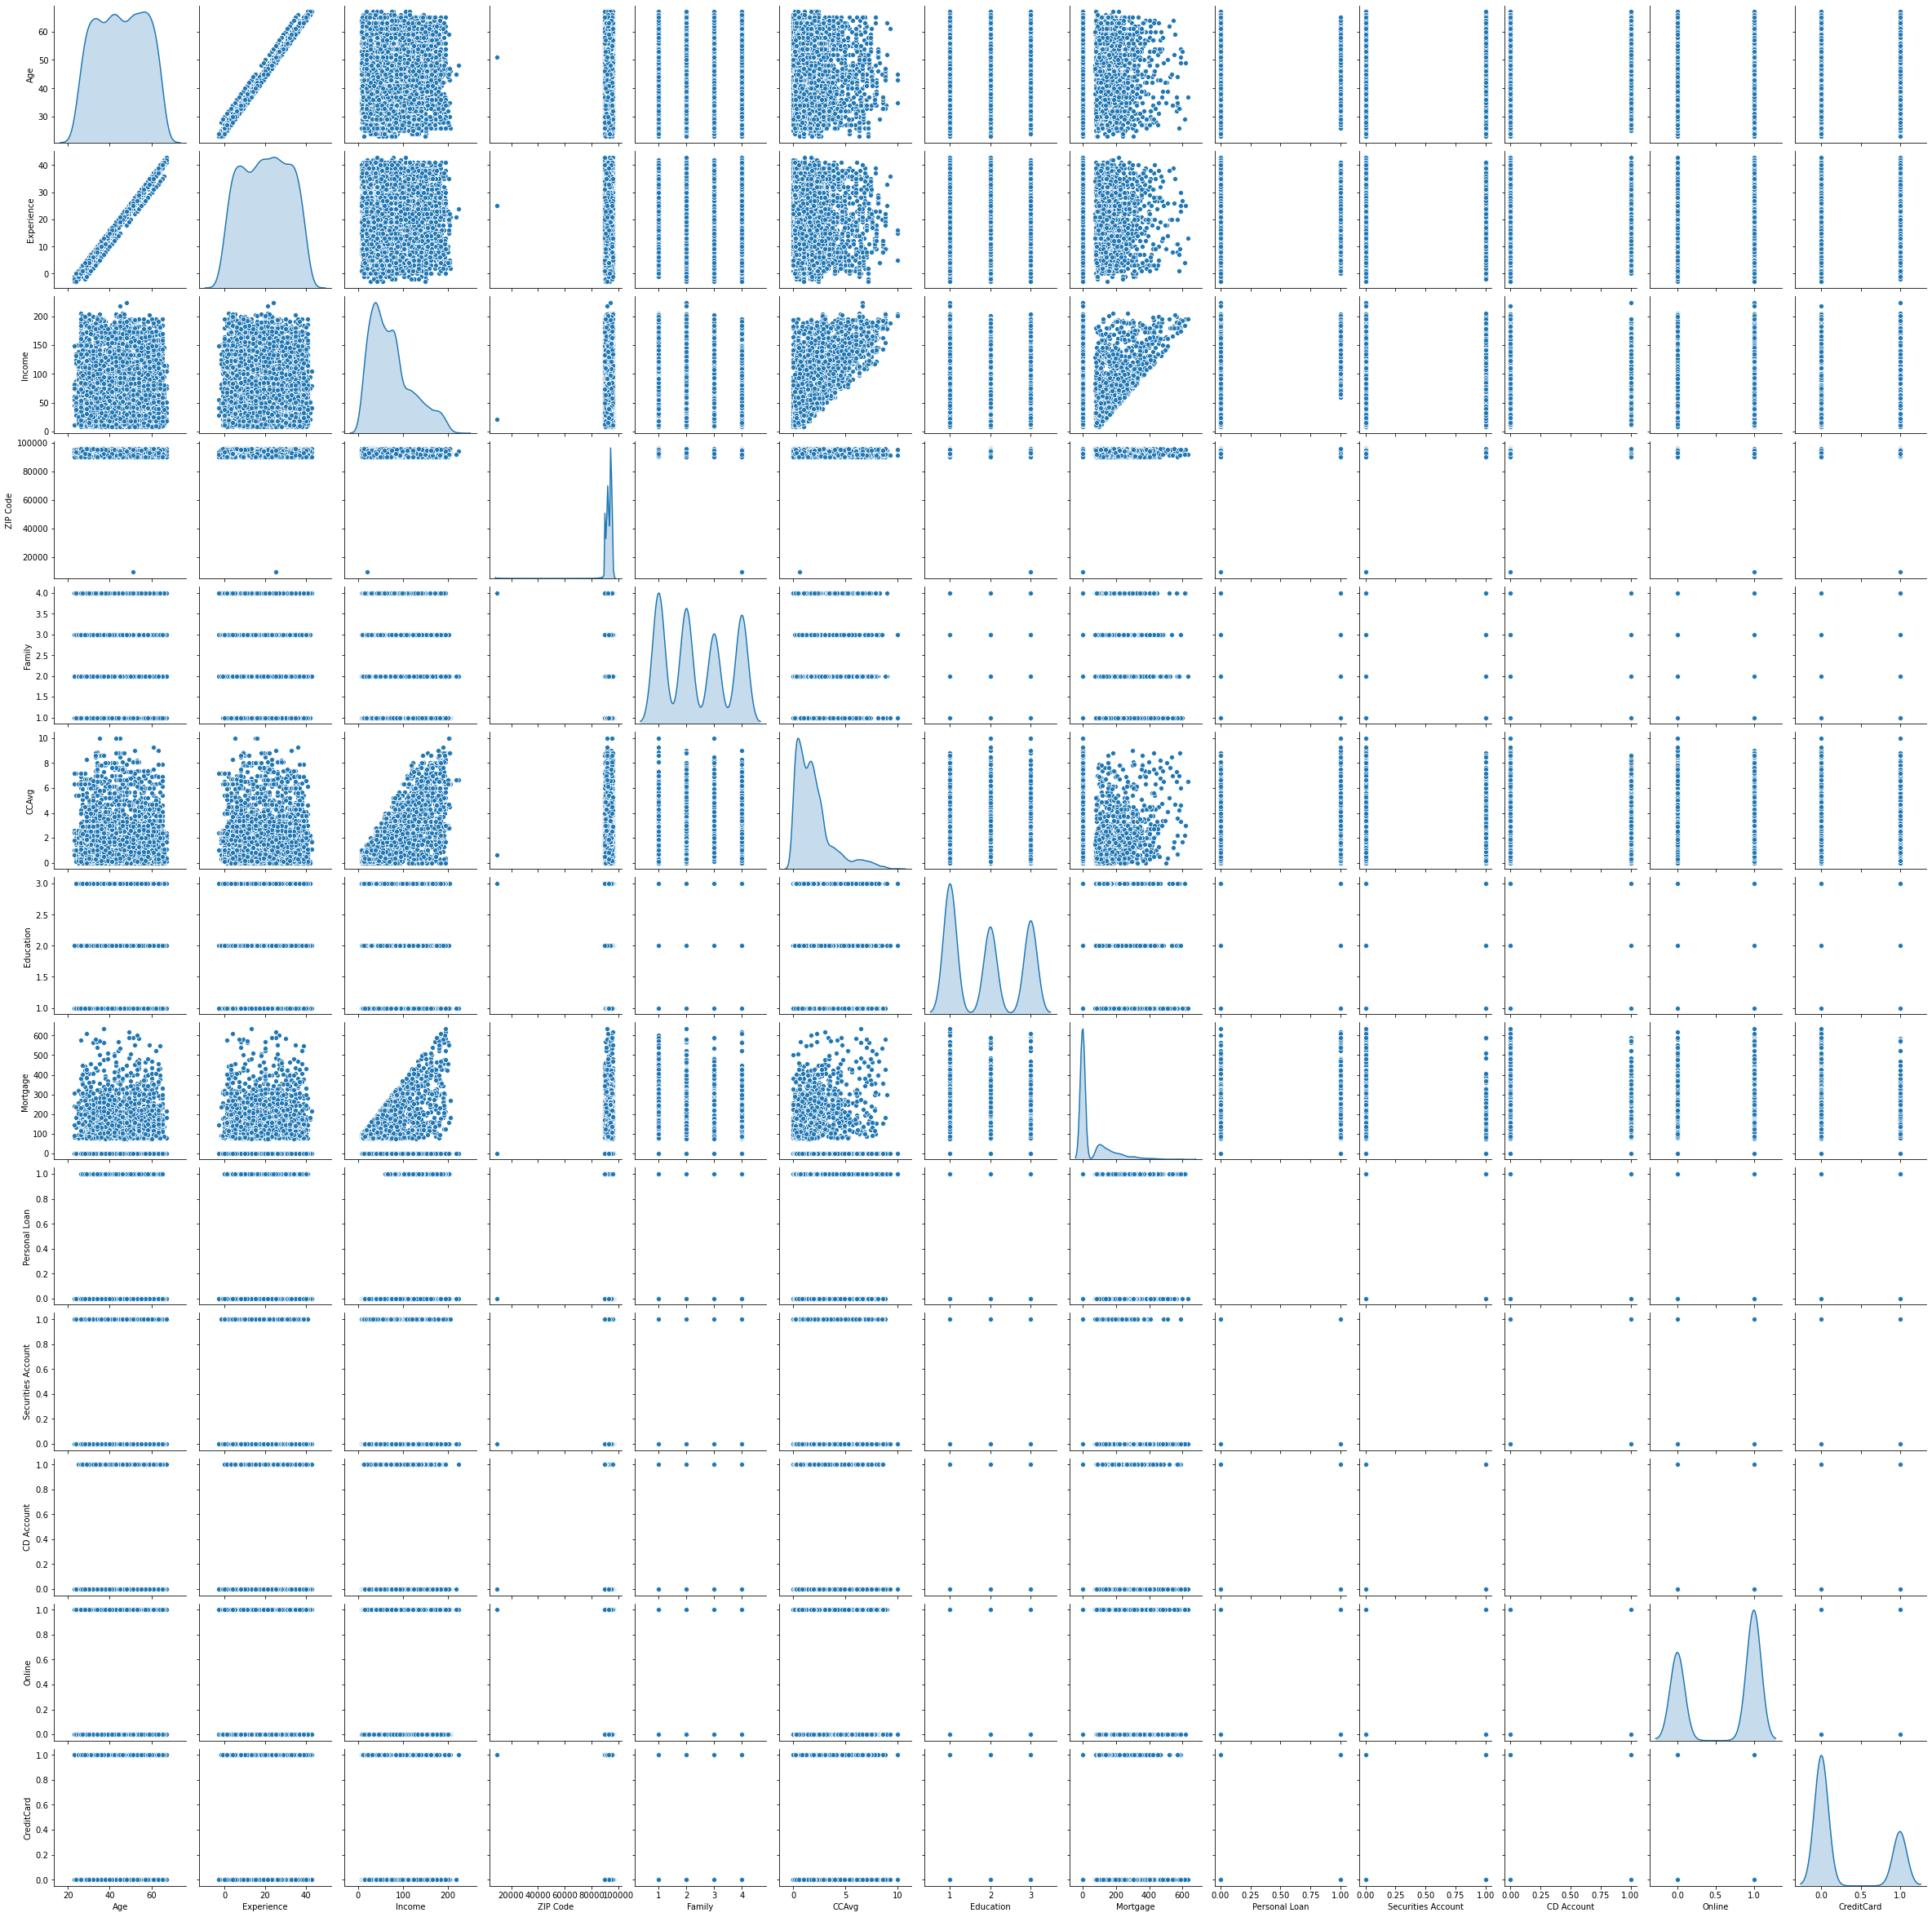

In [12]:
sns.pairplot(cr_df,diag_kind='kde')

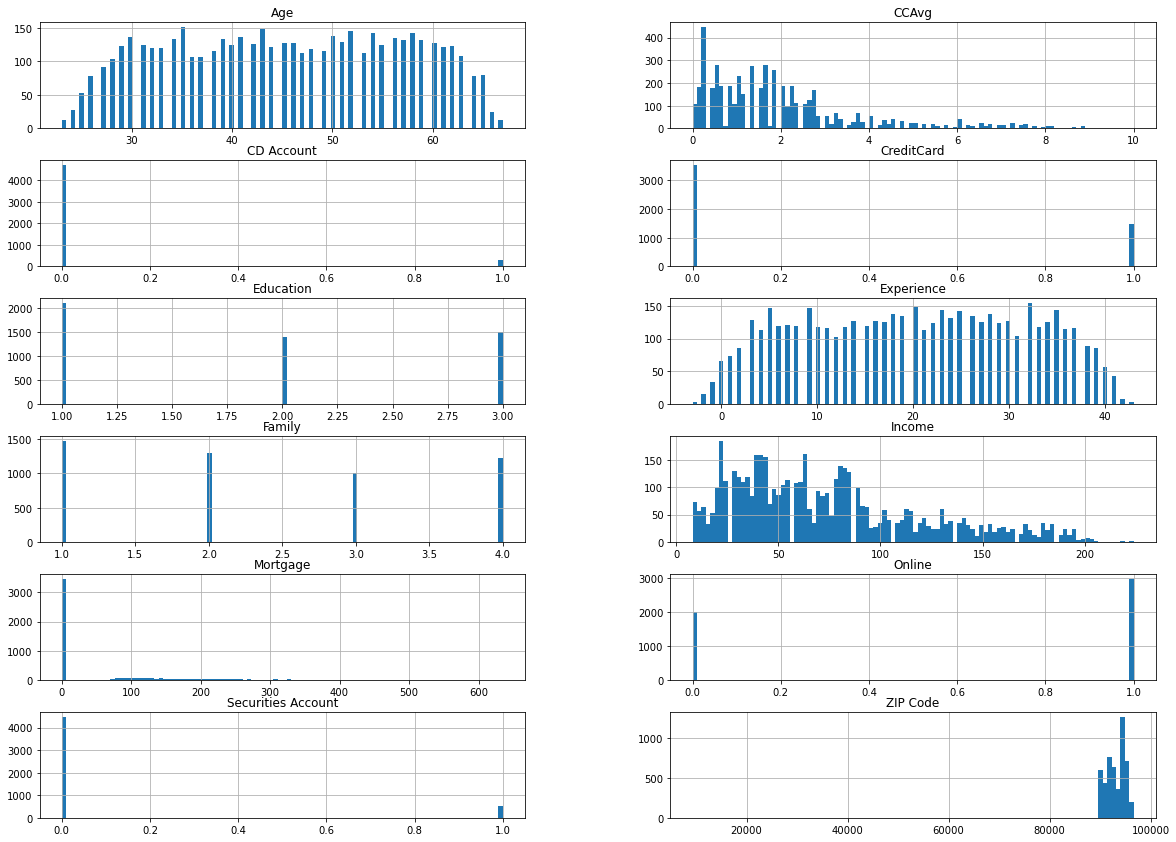

In [57]:
columns = list(cr_df)[0:-1] # Excluding Outcome column which has only 
cr_df[columns].hist(stacked=False, bins=100, figsize=(20,40), layout=(16,2)); 


Observation for both numerical data and catagorical data are as follows:
1) Age has normal distribution.
2) CC avg is skewed to the left
3) Very few customers have Certificate deposit.
4) People who have undergrad education is higher than the other two categories, with people having advanced or professional degreee slightly more than graduate level edication.
5) Expereince is also normally distributed, with a mean of 20 years. 
6) Famlily of size 1 wwere the largest category, follwoed by size 2 and 4 which were both of similar sizes, then the last category was of family of size 3. 
7) Income was skewly distributted with an average of 73.7 dollars.
8) Mortgage was taken by very few customers.
9) More than half of customers use online banking facility.
10) Very small number of people availed personal loan, less than 10%.
11) Small percenatge of customers have securities account. (<10%)
12) Zipcode were from quite far places. 

In [58]:
# correlation between all the variables are plotted in table and in a heat map as well
#Now that we observed the distribution, we shall now observe the correlation between all these varaibales. 
cr_df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007413
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954
CD Account,0.008043,0.010353,0.169738,0.019972,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644,0.316355


In [59]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    

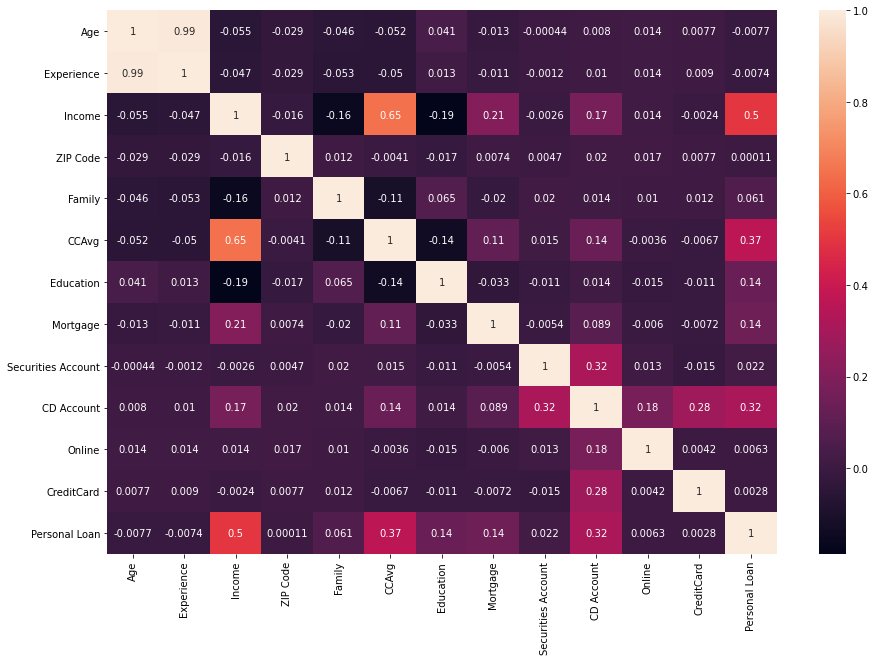

In [60]:
plt.figure(figsize = (15,10))
sns.heatmap(cr_df.corr(), annot = True )
#plot_corr(cr_df)

1) From the correlation it can be observed that the highest relationship between expereince and age was the highest.
2) There was a weak corelation betweeen personal loan and income, personal loan and CC avg and betweeen personal loan and CD. 
3) There was relatively strong corealtion betweeen income and CCavg. 

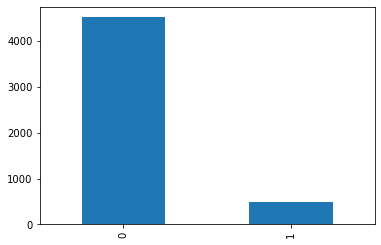

In [61]:
# Target coloumn distribution
# The target column for the present study is personal loan 
cr_df['Personal Loan'].value_counts().plot(kind='bar')

In [62]:
cr_df['Personal Loan'].value_counts()


0    4520
1     480
Name: Personal Loan, dtype: int64

In [63]:
count_no_PL = len(cr_df[cr_df['Personal Loan']==0])
print('count_No_Personal_loan :',count_no_PL)
count_PL = len(cr_df[cr_df['Personal Loan']==1])
print('count_Personal_Loan :',count_PL)
percentage_of_no_PL = count_no_PL/(count_no_PL+count_PL)
#print('percentage_of_no_Personal_loan')
print("percentage of no Personal Loan", percentage_of_no_PL*100)
percentage_of_PL = count_PL/(count_no_PL+count_PL)
print("percentage of Personal Loan", percentage_of_PL*100)
#n_true = len(cr_df.loc[cr_df['Personal Loan'] == True])
#n_false = len(cr_df.loc[cr_df['Personal Loan'] == False])
#print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
#print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

count_No_Personal_loan : 4520
count_Personal_Loan : 480
percentage of no Personal Loan 90.4
percentage of Personal Loan 9.6


In [64]:
cr_df.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


1). The average Income of customers who took personal loan is more than double of the avg income of customers who didn’t take loan last year.

2). The CC avg and Mortage is also double for those who have taken personal loan.

3) It was observed that Avg CD value was ten times more for those who have avalied loan.  

4). Education for those availed personal loan was roughly 22% higher. 

5) It can be seen that the difference in average Age, Expereince, ZIP code, Family size, Securites Account, Online banking and Credit Card for those who availed loan was not different from those who didn't avail loan.   

As given in the data description that person who took loan in the last camping is 9.6%.

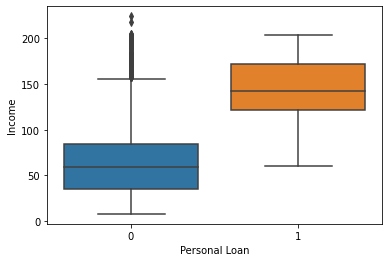

In [65]:
ax = sns.boxplot(y="Income", x="Personal Loan", data=cr_df)

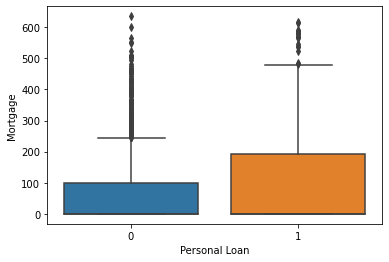

In [66]:
ax = sns.boxplot(y="Mortgage", x="Personal Loan", data=cr_df)

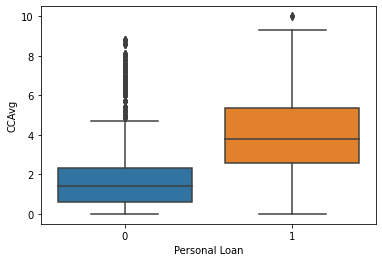

In [67]:
ax = sns.boxplot(y="CCAvg", x="Personal Loan", data=cr_df)

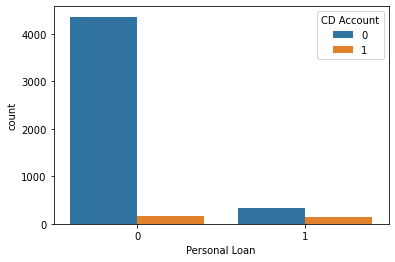

In [68]:
ax = sns.countplot(x="Personal Loan", hue="CD Account", data=cr_df)

In [69]:
cr_df.drop(columns ='Experience',inplace= True)
cr_df.head(2)


,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0


Experience and age is having a good corelation. One among them can be dropped.


4) Spliting the data

In [70]:
array = cr_df
X= array.iloc[:,0:11]
y= array.iloc[:,11]

In [75]:
standardized_X = preprocessing.scale(X)
standardized_X

array([[-1.77441684, -0.53822878, -0.96411408, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.8641094 , -1.44393158, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -1.36379301,  0.73881384, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033, -1.08136314, -0.0610391 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965, -0.53822878, -1.46985492, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285,  0.20043396, -0.25475717, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [76]:
#normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

5) Building different classification models:

Build Logistic Model

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [79]:
y_pred = logreg.predict(X_test)

In [80]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.91


In [82]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


Confusion Matrix for Logistic regression

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1318   33]
 [ 105   44]]


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.30      0.39       149

    accuracy                           0.91      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.89      0.91      0.89      1500



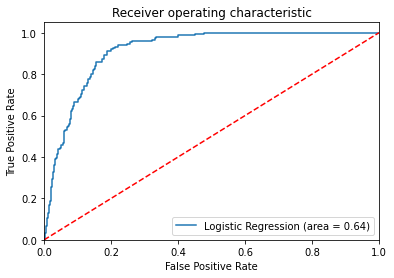

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [89]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.130922
         Iterations 9
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.586    
Dependent Variable:  Personal Loan     AIC:               1331.2237
Date:                2020-12-13 22:04  BIC:               1402.9128
No. Observations:    5000              Log-Likelihood:    -654.61  
Df Model:            10                LL-Null:           -1581.0  
Df Residuals:        4989              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                 0.0056   0.0064   0.8788 0.3795 -0.0069  0.0182
Income              0.0534   0.0026  20.9

Build KNN model

In [90]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
y_pred = classifier.predict(X_test)

In [92]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.92


In [93]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [105]:
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

[[1241  110]
 [  65   84]]


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.56      0.49       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



In [ ]:
#Comparing Error Rate with the K Value

In [95]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

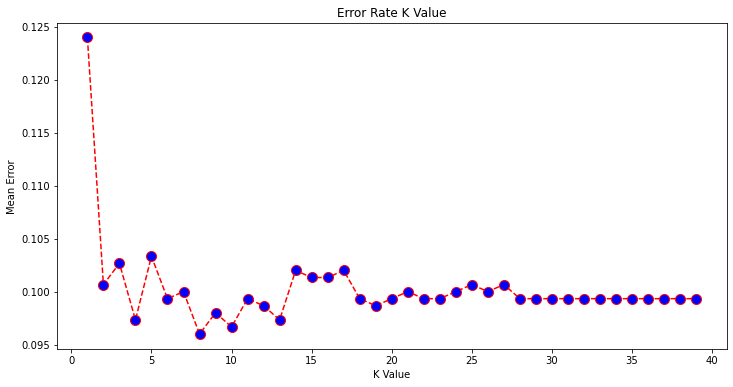

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Naive Bayes Classification

In [97]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [98]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [100]:
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy on test set: 0.8833333333333333


Text(91.68, 0.5, 'predicted label')

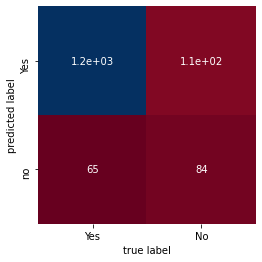

In [102]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Yes', 'No'], yticklabels=['Yes', 'no'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.56      0.49       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



Observations for various differrent models:

The logistic Regression model is the best as the accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. The confusion matrix is also better in comparision to other models.

The requirement is to classify the target. The KNN is distance based which not perfect for this situation.Though the accuracy is good but confusion matrix tells that is correct predictions is not that much acceptable.

The Naive Bayes giving the ccuracy less in comaprision to other models meaning the probability of determing the target correctly is less.